In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Radiometry vs. Photometry

**Radiometry**
- Measures optical radiation based on *physical power*
- Independent of the human eye

**Photometry**
- Measures light based on *human visual perception*
- Weights radiation by eye sensitivity

# Basics of Photometry
Photometry is the relationship between physical light and human vision.

Photometry is used when:
- Designing lighting systems
- Evaluating displays and screens
- Measuring perceived brightness

## The Human Eye as a Detector

The eye does **not** respond equally to all wavelengths

Sensitivity depends on:
- wavelength
- Lighting conditions (day vs. night)

Photometry models this behavior mathematically.

<img src="eye.jpg" width="500">

Human vision
- Based on rods and cones
- Changes based on light level

<img src="vision.jpg" width="700">

**Luminous Efficiency Function:** the conversion from radiometric power, $\Phi_e$ (in watts) to eye response called luminous power, $\Phi_v$ (in lumens). 

$\Phi_v=K \Phi_e$ (Eq. 4.14 in the book)

The eye is wavelength dependent and the coefficient depends on the luminous power (or how bright the light is) resulting in using $K$ for the Photopic regime and $K'$ for the Scotopic regime.  The coefficient is also broken up into the peak value, $K_m$ and the normalized wavelength variation called the luminous efficiency, $V$ as given by

$K(\lambda)=K_m V(\lambda)$ for the Photopic regime (Eq. 4.15 in the book)

and

$K'(\lambda)=K'_m V'(\lambda)$ for the Scotopic regime.

The peak value for Photopic regime is $K_m=683 \frac{lm}{W}$ and $K'_m=1700 \frac{lm}{W}$. Since the values for $V$ and $V'$ are based on the response of the human eye they are determined experimentally.  There are various versions with slight discrepancies. For the assignments in this class we will use the same data set.  We will use the values in the uploaded file called *V.csv*.  This data set is Table 4A.1 in the book. Here is a plot of the functions.

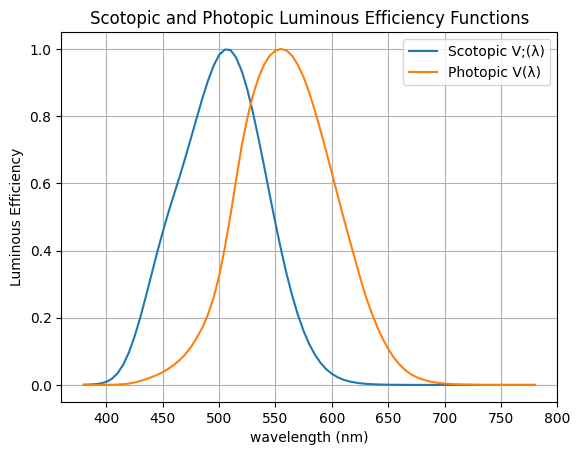

In [2]:
# Read CSV with headers
#CSV file from: http://www.cvrl.org/cvrlfunctions.htm 
data = pd.read_csv("V.csv")

# Use column names directly
plt.figure()
plt.plot(data["Wavelength"], data["V_scotopic"], label="Scotopic V;(λ)")
plt.plot(data["Wavelength"], data["V_photopic"], label="Photopic V(λ)")

# Labels and formatting
plt.xlabel("wavelength (nm)")
plt.ylabel("Luminous Efficiency")
plt.title("Scotopic and Photopic Luminous Efficiency Functions")
plt.legend()
plt.grid(True)
plt.show()

**Photopic vision:**
- Occurs at high light levels
- Dominated by cone cells
- Maximum sensitivity at 555 nm (green)
- Responsible for: Color vision and fine detail

**Scotopic vision:**
- Occurs at low light levels
- Dominated by rod cells
- Peak sensitivity near 507 nm

The conversion from Radiant Power to Luminous Power is done using

$\Phi_v = K_m \int_0^\infty \Phi_e(\lambda) \, V(\lambda) \, d\lambda $  (See Eq. 4.17)

where:
- $\Phi_v$: luminous power (lumens)
- $\Phi_e(\lambda)$: radiant power (Watt)
- $V(\lambda)$: luminous efficiency
- $K_m = 683 \frac{lm}{W}$

Comparing Eq. 17 with Eq. 4.14 we notice some discrepancies.  

- Eq. 4.14 is a constant relationship where $\Phi_v$ has units of lumen, $\Phi_e$ has units of watts, and $K$ has units that relate the two or units of lumen/watt.
- In equation 4.17 $\Phi_v$ is the same with units of lumen; however, $\Phi_e$ is no longer a constant radiant power with units of watts but now varies with wavelength and is actually spectral radiant power with units of W/m.  Therefore, it is a different quantity.  To be more accurate, it would be better to use a different variable like $\Phi_{e,\lambda}$.  The two quantities are related by

$\Phi_e=\int \Phi_{e, \lambda} d \lambda$


<div style="border:4px solid red">

**HW1:**  A white light is measured to have a power of 1 W and is distributed uniformly in the wavelength interval 360 nm ≤ λ ≤ 750 nm. Find the luminous power of the white light. Name the variable hw1. Use V.csv for the values of V.

#HELP

The photopic vision equation is 

$$ \Phi_v = 683 \int \Phi_{e, \lambda}(\lambda)\, V(\lambda)\, d \lambda$$

Since the radiant power is uniformly distributed over the wavelength range, the spectral radiant power is

$$\Phi_{e,\lambda}(\lambda) = \frac{1\,\text{W}}{\lambda_{max} - \lambda_{min}}.$$

Since the spectral radiant power $\Phi_{e, \lambda}$ is constant it can be taken out of the integral resulting in

$$ \Phi_v = \left( 683 \right) \left( \frac{1}{\lambda_{max} - \lambda_{min}} \right) \int_{\lambda_{min}}^{\lambda_{max}}  V(\lambda)\, d \lambda$$

In [3]:
# Read CSV
data = pd.read_csv("V.csv")

# Extract columns
wavelength = data["Wavelength"].values.astype(float)
V_photopic = data["V_photopic"].values.astype(float)

# Restrict to 380–750 nm
mask = (wavelength >= 380) & (wavelength <= 750)
wavelength = wavelength[mask]
V_photopic = V_photopic[mask]

# Luminous power for 1 W uniformly distributed between 360–750 nm
phi_total = 1.0  # radiant power in watts
lambda_min = 360
lambda_max = 750
phi_e_lambda = phi_total / (lambda_max - lambda_min)

# Integrate V(λ) over wavelength grid (nm) using numpy.trapz when available

integral_V = np.trapezoid(V_photopic, wavelength)

# Find power in lumens
hw1 = 683 * phi_e_lambda * integral_V
hw1

np.float64(187.12582253205127)

<div style="border:4px solid red">

**HW2:** Find the luminous power of a 50mW He-Ne laser operating at a free space wavelength of $\lambda = 632.8 nm$.  Assume that the laser is monochromatic. Name variable hw2.

Starting with 

$\Phi_v = 683 \,\frac{lm}{W} \int \Phi_{e, \lambda}(\lambda)\, V(\lambda)\, d\lambda$.

The laser radiant spectral power is 
 
$\Phi_{e,\lambda}(λ) = 0.05 \, \delta (\lambda-632.8)$.

In [4]:
# Read CSV
data = pd.read_csv("V.csv")

# Extract columns as float arrays
wavelength = data["Wavelength"].values.astype(float)
V_photopic = data["V_photopic"].values.astype(float)

# He-Ne laser parameters
phi_e = 0.05           # radiant power in watts (50 mW)
laser_lambda = 632.8   # wavelength in nm

# Interpolate V(λ) at the laser wavelength
V_lambda = np.interp(laser_lambda, wavelength, V_photopic)

# Monochromatic luminous power
hw2 = 683 * phi_e * V_lambda
hw2

np.float64(8.131798000000014)

<div style="border:4px solid red">

**HW3:**  An LED has a wider spectral content than a laser.  The spectral content is often characterized as a Gaussian.  A blue LED has center wavelength of 465nm and the spectrum is characterized as a Gaussian with a full width at half maximum of FWHM=25nm.  The LED has a radiant power of 5mW.  The Gaussian spectral radiant power is given by $\Phi_{e,\lambda}=I_o \exp \left( -\frac{(\lambda-\lambda_o)^2}{2 \sigma^2}\right)$ What is the value for $\sigma$? Name the answer hw3.

**HELP:** 
Normalized: $\Phi_{e,\lambda}= \exp \left( -\frac{(\lambda-\lambda_o)^2}{2 \sigma^2}\right)$ 

In [8]:
# Convert LED FWHM (25 nm) into the Gaussian sigma parameter
FWHM = 25  # nm
sigma = FWHM / (2 * np.sqrt(2 * np.log(2))) #Standard conversion factor from FWHM to sigma for a Gaussian distribution

hw3 = sigma
hw3

np.float64(10.616522503600239)

<div style="border:4px solid red">

**HW4:**  Same LED specifications as the previous problem.  What is the luminous power in lumens? Name the answer hw4.

**HELP:** 

$\Phi_v = 683 \,\frac{lm}{W} \int \Phi_{e, \lambda}(\lambda)\, V(\lambda)\, d\lambda$

$\Phi_v = 683 \,\int I_o \exp \left( -\frac{(\lambda-\lambda_o)^2}{2 \sigma^2}\right)  V(\lambda)\, d\lambda$

You need $I_o$ before you can solve the problem.  

$\Phi_e=I_o \int_{-\infty}^{\infty} \exp \left( -\frac{(\lambda-\lambda_o)^2}{2 \sigma^2}\right) d \lambda$

In [11]:
# HW4: luminous power for the 5 mW blue LED with Gaussian spectrum
phi_e_led = 5e-3          # radiant power in watts
lambda0 = 465            # center wavelength in nm

# Photopic response data
data = pd.read_csv("V.csv")
wavelength = data["Wavelength"].values.astype(float)
V_photopic = data["V_photopic"].values.astype(float)

# Gaussian spectral shape (sigma imported from the HW3 cell)
gaussian = np.exp(-((wavelength - lambda0) ** 2) / (2 * sigma**2))
I0 = phi_e_led / np.trapezoid(gaussian, wavelength) # Divide total power by normalized gaussian area to find I_0
phi_e_lambda = I0 * gaussian # Apply I_0 to gaussian to get spectral power distribution in W/nm

# Luminous power integral
hw4 = 683 * np.trapezoid(phi_e_lambda * V_photopic, wavelength)
hw4

np.float64(0.2775041942140379)

Now plug into the luminous power equation.

$\Phi_v = 683*0.000188 \int_{-\infty}^{\infty} \exp \left( -\frac{(\lambda-\lambda_o)^2}{2 \sigma^2}\right)*V \, \, d \lambda$

In [10]:
# get V
data = pd.read_csv("V.csv")
wavelength = data["Wavelength"].values
V_photopic = data["V_photopic"].values

lam = data["Wavelength"].to_numpy()
V   = data["V_photopic"].to_numpy()


#ADD CODE

We have done conversions from Radiant Power to Luminous Power.  Now we need to do Luminous Power to Radiant Power.  Typically, LED datasheets list the luminous power rather than the radiant power unless the LEDs are outside of the visible spectrum.  We need to be able to convert from luminous power to radiant power. Here is our main equation:

$\Phi_v = 683 \, \int \Phi_{e, \lambda}(\lambda)\, V(\lambda)\, d\lambda$

We are typically given the normalized radiant power spectral density.  Let's call it $\Phi_{e,n}$.  So, the equation is

$\Phi_v = 683 \, \int I_o \Phi_{e, n} \, V(\lambda)\, d\lambda$

  The radiant power is then given by

$\Phi_e= I_o \int \Phi_{e,n} d\lambda$

Putting these together we get

$\Phi_v = 683 \, I_o \int \Phi_{e,n} \, V \, d\lambda$ and $I_o =\frac{\Phi_e}{\int \Phi_{e,n} d\lambda}$

Resulting in 

$\Phi_e=\frac{\Phi_v \, \int \Phi_{e,n} d \lambda}{683 \int \Phi_{e,n} V d\lambda}$


<div style="border:4px solid red">

**HW5:**  The characteristics of the JE2835 red LED CREE is described in LED4.pdf on pages 61-64. The Group C3 has a flux of 27.2 lumens, a center wavelength of 630nm, forward current of 137mA, forward voltage of 2.25V, and a wavelength spectrum given in this figure.

<img src="led4_spectrum.jpg" width="500">

The normalized LED spectrum usually can be fit to a Gaussian function as given by $I(\lambda)=exp\left( -\frac{\left( \lambda-\lambda_o \right)^2}{2 \sigma^2} \right)$.  For this LED $\lambda_o=630nm$. Save $\sigma$ as hw3. Basic process: (1) Extract the data from the image.  Here is a good data extraction website: https://automeris.io/.   (2) Clip the wavelength range to be from 590nm to 670nm. (3) Fit the data to a Gaussian. Plot the data and the function to see comparison.  (You can see that the spectrum is not exactly symmetric.  But it is close enough for this problem.)

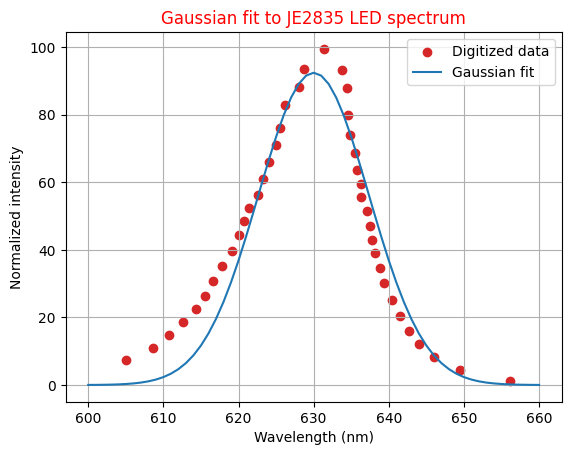

np.float64(7.373220871905935)

In [16]:
# --- Read CSV ---
df = pd.read_csv("LED4_spectrum.csv")

x = df["Wavelength"].to_numpy(dtype=float)
y = df["Intensity"].to_numpy(dtype=float)

# --- Clip to 600–660 ---
mask = (x >= 600) & (x <= 660)
x = x[mask]
y = y[mask]

wavelength = np.arange(600, 660 + 1e-9, 1)

# Gaussian fit with fixed center wavelength (630 nm) but free amplitude and sigma
def gaussian_model(lam, amp, sigma):
    return amp * np.exp(-((lam - 630.0) ** 2) / (2 * sigma**2))

popt, _ = curve_fit(gaussian_model, x, y, p0=(1.0, 10.0), bounds=(0, np.inf))
amp_fit, sigma_fit = popt

hw5 = sigma_fit  # store sigma as requested

# Plot extracted data vs fitted Gaussian
plt.figure()
plt.scatter(x, y, color="tab:red", label="Digitized data")
plt.plot(wavelength, gaussian_model(wavelength, amp_fit, sigma_fit), label="Gaussian fit")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized intensity")
plt.title("Gaussian fit to JE2835 LED spectrum", color="red")
plt.legend()
plt.grid(True)
plt.show()

hw5

<div style="border:4px solid red">

**HW6:**  The characteristics of the JE2835 red LED CREE is described in LED4.pdf on pages 61-64. The Group C3 has a flux of 27.2 lumens, a center wavelength of 630nm, forward current of 137mA, forward voltage of 2.25V, and a wavelength spectrum given in LED4_Gaussian_fit_5nm.csv.  What is the power of the LED in mW?  name answer hw6

In [17]:
# HW6: convert 27.2 lm LED flux into radiant power using the fitted Gaussian spectrum
phi_v_led = 27.2  # lumens per spec

# Normalized spectral distribution (5 nm step, already digitized)
led_spec = pd.read_csv("LED4_Gaussian_fit_5nm.csv")
lam_led = led_spec["Wavelength_nm"].values
phi_en = led_spec["Normalized_Intensity_Fit"].values

# Photopic response for weighting (reuse V.csv data)
V_df = pd.read_csv("V.csv")
lam_V = V_df["Wavelength"].values
V_vals = V_df["V_photopic"].values
V_interp = np.interp(lam_led, lam_V, V_vals)

# Required integrals (nm units cancel in ratio)
int_phi_en = np.trapezoid(phi_en, lam_led)
int_phi_en_V = np.trapezoid(phi_en * V_interp, lam_led)

phi_e_watts = phi_v_led * int_phi_en / (683 * int_phi_en_V)

hw6 = phi_e_watts * 1e3  # convert to mW as requested
hw6

np.float64(146.44854368505676)

Here is a picture of white LED, the LUXEON HL1Z LED, which is used for lighting. 

<img src="lighting.jpg" width="300">

The datasheet for this LED is LED3.pdf. The white LED is created by using a blue LED that illuminates a phosphor coating.

<img src="white_led.jpg" width="500">

Here is the wavelength spectrum from the datasheet

<img src="spectrum1.jpg" width="500">

You can see that there is a spike in the 'blue' region of the spectrum.  This spike is from the blue LED.  And there is a wide spectrum in the longer wavelength.  This wider portion is from the phosphor emission.  The white color is adjusted by controlling the phosphor.  Some spectrum has more blue (see L1HZ-65801) and some have more yellow (see L1HZ-30801).  The wavelength spectrum is often characterized using Correlated Color Temperature (CCT).  This refers to the temperature of blackbody radiation.  The CCT is measured in Kelvin.  

Typical CCT ranges
- 2700–3000 K → Warm white (yellowish, incandescent-like)
- 3500–4100 K → Neutral white
- 5000–6500 K → Cool / daylight white (bluish)

The see L1HZ-65801 has a CCT of 6500K (more bluish) and the L1HZ-30801 has a CCT of 3000K (more yellowish).

The CCT designation is based on blackbody radiation. Blackbody radiation describes the electromagnetic radiation emitted by
an idealized object that absorbs all incident radiation and re-emits energy according to its temperature. The spectral radiance of a blackbody as a function of wavelength is
given by 

$B = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}$      

where $B_\lambda(T)$ is the spectral radiance in units of $\frac{W}{m^2*sr*m}$,  $h=6.62607015 \times 10^{−34} \, J s$ is Planck's constant, $c=3 \times 10^8 \, m/s$ is the speed of light,  $\lambda$ is the wavelength, $k_B=1.380649 \times 10^{-23} \, J/K$ is Boltzmann's constant, and $T$ is the absolute temperature.  

Here are the normalized blackbody radiation curves for the two temperatures of interest.

<div style="border:4px solid red">

**HW7:** The datasheet for the L1HZ-65801 LED (see LED3.pdf) says that it has a nominal CCT of 6500 and the L1HZ-30801 has a nominal CCT of 3000.  Use the same wavelength as the luminous efficiency ($380nm < \lambda < 730$ with a $5nm$ step size).  All plots need to be on the same plot pane with a legend. Normalize each plot so that its integral is $\left(B=\frac{B}{\Delta \lambda \sum B} = \frac{B}{5 \sum B} \right)$.

Go to https://automeris.io/ to digitize the data LED data.  

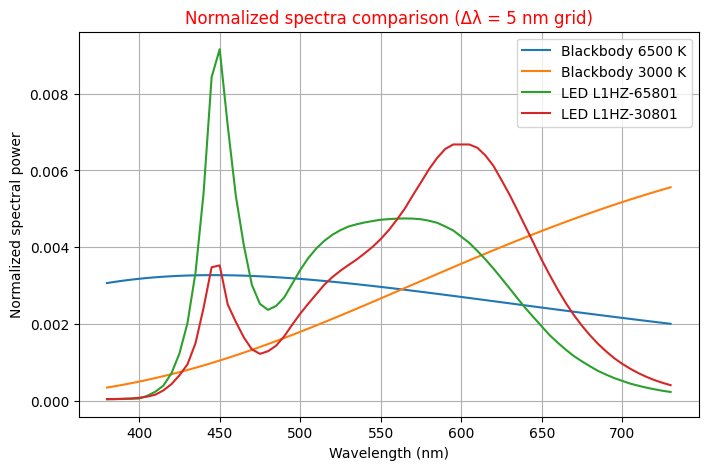

In [20]:
# HW7: compare normalized blackbody curves vs LED spectra on common wavelength grid
h  = 6.62607015e-34    # Planck constant [J s]
c  = 299792458.0       # speed of light [m/s]
kB = 1.380649e-23      # Boltzmann constant [J/K]

# Common wavelength grid (nm) matching luminous efficiency table
lambda_nm = np.arange(380, 731, 5)
lambda_m = lambda_nm * 1e-9

def planck_radiance(lam_m, temperature):
    expo = np.exp((h * c) / (lam_m * kB * temperature)) - 1
    return (2 * h * c**2) / (lam_m**5 * expo)

def normalize_spectrum(values):
    return values / (5 * np.sum(values))

# Blackbody spectra for 6500 K and 3000 K
B1 = planck_radiance(lambda_m, 6500)
B2 = planck_radiance(lambda_m, 3000)
B1_norm = normalize_spectrum(B1)
B2_norm = normalize_spectrum(B2)

# Digitized LED spectra (interpolated onto same grid)
df1 = pd.read_csv("LED_spectrum_65801.csv")
df2 = pd.read_csv("LED_spectrum_30801.csv")
I1_interp = np.interp(lambda_nm, df1["Wavelength"].values, df1["Intensity"].values, left=0, right=0)
I2_interp = np.interp(lambda_nm, df2["Wavelength"].values, df2["Intensity"].values, left=0, right=0)
I1_norm = normalize_spectrum(I1_interp)
I2_norm = normalize_spectrum(I2_interp)

plt.figure(figsize=(8, 5))
plt.plot(lambda_nm, B1_norm, label="Blackbody 6500 K")
plt.plot(lambda_nm, B2_norm, label="Blackbody 3000 K")
plt.plot(lambda_nm, I1_norm, label="LED L1HZ-65801")
plt.plot(lambda_nm, I2_norm, label="LED L1HZ-30801")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized spectral power")
plt.title("Normalized spectra comparison (Δλ = 5 nm grid)", color="red")
plt.legend()
plt.grid(True)
plt.show()

<div style="border:4px solid red">

**HW8:** Calculate the optical power in watts for the L1HZ-30801 LED (see LED3.pdf). The LED has 132 lumens. The normalized power spectrum is in LED_spectrum_30801.csv.  Name the answer hw8.

In [22]:
# HW8: convert 132 lm luminous flux to radiant power using measured white LED spectrum
phi_v_led = 132.0  # lumens

spec = pd.read_csv("LED_spectrum_30801.csv")
lam_led = spec["Wavelength"].values
phi_en = spec["Intensity"].values

V_df = pd.read_csv("V.csv")
lam_V = V_df["Wavelength"].values
V_vals = V_df["V_photopic"].values
V_interp = np.interp(lam_led, lam_V, V_vals)

int_phi_en = np.trapezoid(phi_en, lam_led)
int_phi_en_V = np.trapezoid(phi_en * V_interp, lam_led)

phi_e_watts = phi_v_led * int_phi_en / (683 * int_phi_en_V)
hw8 = phi_e_watts
hw8

np.float64(0.3984658629373717)

<div style="border:4px solid red">

**HW9:** What is the luminous efficacy (luminous power/electrical power) of the LED? Use variable hw9.  The datasheet list the typical voltage as 2.8V and the maximum current as 700mA.  But if you look at Figure 3 you see that the normalized light output for 1 is 350mA.  The 132 lumens corresponds to a current of 350mA NOT 700mA.  

In [23]:
V = 2.8
I = 350e-3
P = V * I

hw9 = hw8 / P
hw9

np.float64(0.4065978193238487)